<a href="https://colab.research.google.com/github/ajalamarvellous/Deeplearning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam

In [7]:
#setting the transformation edits normalizing to mean of 0.5 and STD of 0.5
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5))
                                ])
 
#downloading the train and test dataset
trainset = datasets.FashionMNIST("F~MNIST/", download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle = True)
 
testset = datasets.FashionMNIST("F~MNIST/", download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle = True)

In [11]:
images, labels = next(iter(trainloader))
print(f"shape of images {images.shape}")

shape of images torch.Size([64, 1, 28, 28])


In [24]:
class Model(nn.Module):
  #initializing the model
  def __init__(self):
    super().__init__()
    self.fc1= nn.Linear(784, 500)
    self.fc2 = nn.Linear(500, 360)
    self.fc3 = nn.Linear(360, 250)
    self.fc4 = nn.Linear(250, 100)
    self.output = nn.Linear(100,10)
    self.dropout = nn.Dropout(p= 0.25)
 
  #defining the forward prop
  def forward(self, x):
    #reshaping the input
    x = x.view(x.shape[0], -1)
 
    #hidden channels with dropouts
    X= self.dropout(F.relu(self.fc1(x)))
    X= self.dropout(F.relu(self.fc2(X)))
    X= self.dropout(F.relu(self.fc3(X)))
    X= self.dropout(F.relu(self.fc4(X)))
 
    #output channel with no dropout
    final = F.log_softmax(self.output(X), dim= 1)
    return final

In [23]:
Model()

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=360, bias=True)
  (fc3): Linear(in_features=360, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [32]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0/10....training loss ....0.6322392746806145...test loss 0.43748777772590614.....accuracy......1.0
Epoch 1/10....training loss ....0.43694416036420286...test loss 0.4193003354178872.....accuracy......0.875
Epoch 2/10....training loss ....0.3946041439705566...test loss 0.39958408598307593.....accuracy......0.8125
Epoch 3/10....training loss ....0.36840324110186684...test loss 0.39973414551680253.....accuracy......0.9375
Epoch 4/10....training loss ....0.3517049723533171...test loss 0.3533067555184577.....accuracy......0.9375
Epoch 5/10....training loss ....0.33619358118917386...test loss 0.35477189207152954.....accuracy......0.6875
Epoch 6/10....training loss ....0.3244760981929709...test loss 0.3575770951760043.....accuracy......0.875
Epoch 7/10....training loss ....0.31145205876148585...test loss 0.3393091913431313.....accuracy......0.8125
Epoch 8/10....training loss ....0.2999748141764959...test loss 0.32985617377006327.....accuracy......0.9375
Epoch 9/10....training loss ....0

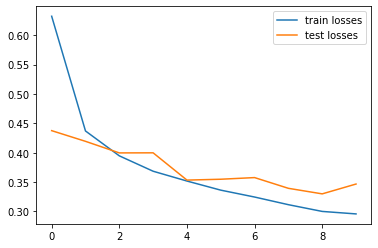

In [33]:
 
#initializing mod
model = Model()
 
#initializing the loss to logloss since we are already using softmax
loss_criterion = nn.NLLLoss()
 
#initializing optimization technique to Adam
optimizer = Adam(model.parameters(), lr= 0.0005)
 
epoch = 10
train_losses, test_losses = [],[]
 
 
for x in range(epoch):
  #setting to train mode
  model.train()
  total_loss = 0
 
  #getting images and labels 
  for images, labels in trainloader:
 
    #clearing backward gradient of optimizer
    optimizer.zero_grad()
 
    #forward propagation
    forwardprop = model.forward(images)
 
    #getting the loss function
    Loss = loss_criterion(forwardprop, labels)
 
    #backward propagation
    Loss.backward()
 
    #updating the weights
    optimizer.step()
 
    #updating loss
    total_loss += Loss.item()
 
  else:
    #setting to validation mode
    model.eval() 
 
    test_loss= 0
    accuracy = 0
 
    #setting to no grad for evaluation, to save memory and dataset computing
    with torch.no_grad():
 
      #getting images and labels from testloader
      for images, labels in testloader:
      
        #forward propagation
        forwardprop = model.forward(images)
 
        #getting the loss function
        loss = loss_criterion(forwardprop, labels)
 
        test_loss += loss.item()
 
        results= F.softmax(forwardprop)
 
        #gettinv the top probability and class too
        top_p, top_class = results.topk(1,dim=1)
 
       #getting no of correct answers
        eval = labels == top_class.view(labels.shape)
        accuracy = torch.mean(eval.type(torch.FloatTensor))
 
    train_losses.append(total_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    #reset to training mode again
    model.train()
 
    print(f"Epoch {x}/{epoch}....training loss ....{total_loss/len(trainloader)}...test loss {test_loss/len(testloader)}.....accuracy......{accuracy}")
 
plt.plot(train_losses, label = "train losses")
plt.plot(test_losses, label = "test losses")
plt.legend()

In [39]:
 
model_saved = {"input_shape":784,
               "output_shape": 10,
               "hidden_layers": [500,360,250,100],
               "state_dict": model.state_dict()}
 
torch.save(model_saved, "model_saved.pth")